In [1]:
import numpy as np
import matplotlib.pyplot as plt
def v(x,t):
    return np.exp(-9*np.pi**2*t)*np.sin(3*np.pi*x)
def FTCS(n,t,mode):
    dx = 1/(n-1)
    dt = dx**2/2
    if mode:
        dt = dx**2/6
    time = 0
    
    u = np.zeros(n)
    for i in  range(0,n):
        u[i] = np.sin(3*np.pi*dx*i)
    while time<t:
        if time+dt>t:
            dt = t-time
        unew = np.zeros(n)
        for i in range(1,n-1):
            unew[i]=u[i]+(dt/dx**2)*(u[i+1]-2*u[i]+u[i-1])
        time+=dt
        u = unew
    return u
plt.plot(np.linspace(0,1,32),exact1)
exact1 = v(np.linspace(0,1,32),0.02)
exact2 = v(np.linspace(0,1,64),0.02)
exact3 = v(np.linspace(0,1,128),0.02)
exact4 = v(np.linspace(0,1,256),0.02)

solutions1 = FTCS(32,0.02,False)
err2d1 = np.linalg.norm(solutions1-exact1)
#print(solutions1)
print(err2d1)

solutions2 = FTCS(64,0.02,False)
err2d2 = np.linalg.norm(solutions2-exact2)
#print(solutions2)
print(err2d2)

solutions3 = FTCS(128,0.02,False)
err2d3 = np.linalg.norm(solutions3-exact3)
#print(solutions3)
print(err2d3)

solutions4 = FTCS(256,0.02,False)
err2d4 = np.linalg.norm(solutions4-exact4)
#print(solutions4)
print(err2d4)

print()
print("---dt^2/6---")

solutions5 = FTCS(32,0.02,True)
err2d5 = np.linalg.norm(solutions5-exact1)
#print(solutions5)
print(err2d5)

solutions6 = FTCS(64,0.02,True)
err2d6 = np.linalg.norm(solutions6-exact2)
#print(solutions6)
print(err2d6)

solutions7 = FTCS(128,0.02,True)
err2d7 = np.linalg.norm(solutions7-exact3)
#print(solutions7)
print(err2d7)

solutions8 = FTCS(256,0.02,True)
err2d8 = np.linalg.norm(solutions8-exact4)
#print(solutions8)
print(err2d8)
print()
print(solutions4[254])
print(v(254/255,0.02))

print(solutions4[128])
print(v(128/255,0.02))

0.018260430824777064
0.006299508248134241
0.002199653550624639
0.0007729861581560023

---dt^2/6---
3.605231891125252e-05
2.89940565804225e-06
2.764044790349723e-07
1.1731967868403413e-08

0.006250570996587897
0.006253100578168617
-0.16912720235350504
-0.16919564746933483


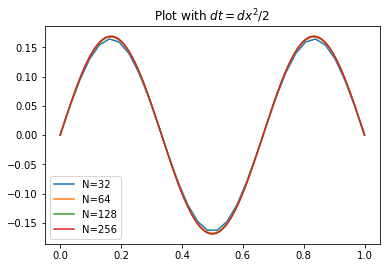

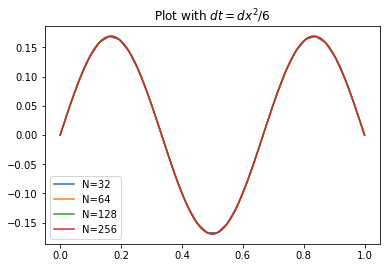

In [7]:
plt.plot(np.linspace(0,1,32),solutions1,label="N=32")
plt.plot(np.linspace(0,1,64),solutions2,label="N=64")
plt.plot(np.linspace(0,1,128),solutions3,label="N=128")
plt.plot(np.linspace(0,1,256),solutions4,label="N=256")
plt.title("Plot with $dt={{dx}^2/2}$")
plt.legend()
plt.show()

plt.plot(np.linspace(0,1,32),solutions5,label="N=32")
plt.plot(np.linspace(0,1,64),solutions6,label="N=64")
plt.plot(np.linspace(0,1,128),solutions7,label="N=128")
plt.plot(np.linspace(0,1,256),solutions8,label="N=256")
plt.title("Plot with $dt={{dx}^2/6}$")
plt.legend()
plt.show()
